# Weather Data

In [14]:
import pandas as pd
import seaborn as sns

C:\Users\danie\anaconda3\envs\internalProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
weather_df = pd.read_csv("aws_10min.csv")
weather_df.head()

,FID,the_geom,code,timestamp,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction,qc_flags
0,aws_10min.fid-4e4aabc1_182a19c94eb_-21b0,POINT (3.202 51.348),6418,2017-12-31T23:00:00,994.88,7.65,79.06,0.0,13.29,210.7,"{""validated"": {""air_pressure"":true,""air_temper..."
1,aws_10min.fid-4e4aabc1_182a19c94eb_-21af,POINT (5.255 50.194),6472,2017-12-31T23:00:00,967.99,8.31,77.69,0.0,8.82,231.4,"{""validated"": {""air_pressure"":true,""air_temper..."
2,aws_10min.fid-4e4aabc1_182a19c94eb_-21ae,POINT (5.255 50.194),6472,2017-12-31T23:10:00,968.07,8.14,76.96,0.0,7.50,239.3,"{""validated"": {""air_pressure"":true,""air_temper..."
3,aws_10min.fid-4e4aabc1_182a19c94eb_-21ad,POINT (3.202 51.348),6418,2017-12-31T23:10:00,994.80,7.92,79.31,0.0,12.87,210.0,"{""validated"": {""air_pressure"":true,""air_temper..."
4,aws_10min.fid-4e4aabc1_182a19c94eb_-21ac,POINT (5.255 50.194),6472,2017-12-31T23:20:00,968.21,7.45,79.24,0.0,6.55,244.7,"{""validated"": {""air_pressure"":true,""air_temper..."


<AxesSubplot:xlabel='air_pressure', ylabel='Count'>

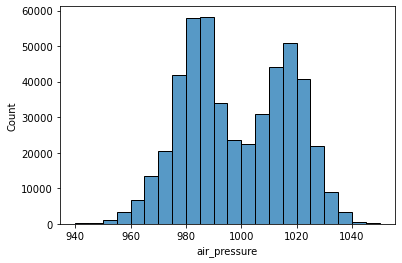

In [32]:
sns.histplot(data=weather_df, x='air_pressure', binwidth=5, binrange=(940, 1050))

<AxesSubplot:xlabel='air_temperature', ylabel='Count'>

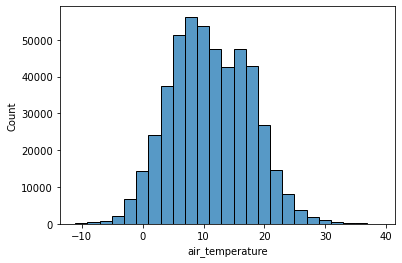

In [33]:
sns.histplot(data=weather_df, x='air_temperature', binwidth=2)

<AxesSubplot:xlabel='relative_humidity', ylabel='Count'>

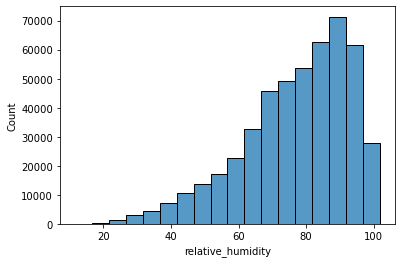

In [34]:
sns.histplot(data=weather_df, x='relative_humidity', binwidth=5)

<AxesSubplot:xlabel='precipitation', ylabel='Count'>

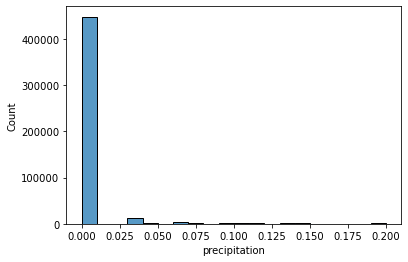

In [35]:
sns.histplot(data=weather_df, x='precipitation', binwidth=0.01, binrange=(0, 0.2))

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

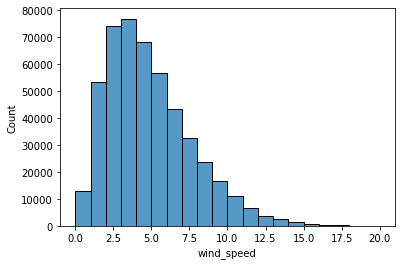

In [40]:
sns.histplot(data=weather_df, x='wind_speed', binwidth=1, binrange=(0, 20))

<AxesSubplot:xlabel='wind_direction', ylabel='Count'>

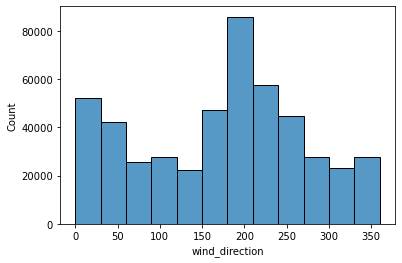

In [47]:
sns.histplot(data=weather_df, x='wind_direction', binwidth=30, binrange=(0, 360))

## Generators

<AxesSubplot:>

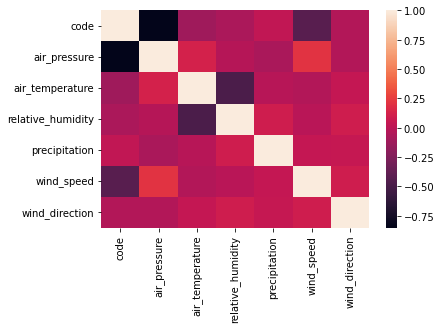

In [51]:
corr_matrix = weather_df.corr()
sns.heatmap(corr_matrix)

In [55]:
generators_df = pd.read_csv("installed_power.csv", delimiter=';')

WI: wind, NG: natural gas, NU: nuclear, LF: Liquid Fuel, WA: Water, Other: mostly solar?, CP: Coal Pulverized

In [57]:
generators_df['Fuel code'].unique()

array(['WI', 'NG', 'NU', 'LF', 'WA', 'Other', 'CP'], dtype=object)

In [64]:
wind_turbines = generators_df.loc[generators_df['Fuel code'] == 'WI'].copy()
wind_turbines.drop(columns=['Production Unit Type', 'Fuel code'], inplace=True)
wind_turbines.head()

,Date,BRP,Unit,Pmax available
0,2022-01-01,Axpo Solutions,Windvision Estinnes WIND,81.2
1,2022-01-01,Electrabel,Belwind Phase 1,171.0
8,2022-01-01,Electrabel,Infrabel Avernas Greensky Wind,32.0
25,2022-01-01,Lampiris,Rentel Offshore WP,307.0
39,2022-01-01,Electrabel,ArcelorMittal Belgium Gent Wind,33.5


<AxesSubplot:xlabel='Pmax available', ylabel='Count'>

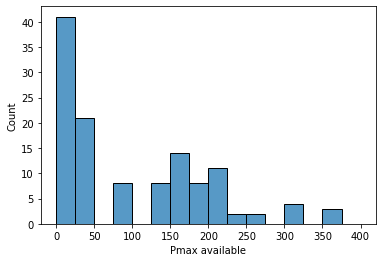

In [66]:
sns.histplot(data=wind_turbines, x='Pmax available', binwidth=25, binrange=(0, 400))